In [29]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import re


In [44]:
data=pd.read_csv("train.tsv", sep='\t')
print(data)

        PhraseId  SentenceId  \
0              1           1   
1              2           1   
2              3           1   
3              4           1   
4              5           1   
...          ...         ...   
156055    156056        8544   
156056    156057        8544   
156057    156058        8544   
156058    156059        8544   
156059    156060        8544   

                                                   Phrase  Sentiment  
0       A series of escapades demonstrating the adage ...          1  
1       A series of escapades demonstrating the adage ...          2  
2                                                A series          2  
3                                                       A          2  
4                                                  series          2  
...                                                   ...        ...  
156055                                          Hearst 's          2  
156056                          forced avuncula

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [46]:
print(data.Sentiment.value_counts())

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64


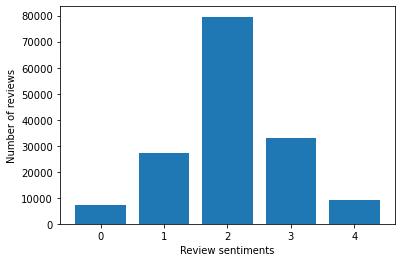

In [47]:
Sentiment_count= data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values,Sentiment_count['Phrase'])
plt.xlabel("Review sentiments")
plt.ylabel("Number of reviews")
plt.show()

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token=RegexpTokenizer(r'[a-zA-Z0-9]+')
cv=CountVectorizer(ngram_range=(4,4),lowercase=True,tokenizer=token.tokenize,stop_words='english')
text_counts=cv.fit_transform(data['Phrase'])

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, data['Sentiment'], test_size=0.3, random_state=1)
#from sklearn.naive_bayes import MultinomialNB
#from sklearn import metrics
clf=MultinomialNB().fit(X_train,Y_train)
predicted=clf.predict(X_test)
print("MultinomailNM accuracy:",metrics.accuracy_score(Y_test,predict))

MultinomailNM accuracy: 0.6049169122986885


In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf=tf.fit_transform(data['Phrase'])


In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, data['Sentiment'], test_size=0.3, random_state=1)
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
clf=MultinomialNB().fit(X_train,Y_train)
predicted=clf.predict(X_test)
print("MultinomailNM accuracy:",metrics.accuracy_score(Y_test,predict))

MultinomailNM accuracy: 0.6049169122986885
